In [2]:
!pip install Tokenterminal
from tokenterminal import TokenTerminal
token_terminal = TokenTerminal(key='6c37f0ff-5c2b-4564-8286-3bccf6e42fd2')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
!cp /content/drive/MyDrive/Colab\ Notebooks/TokenTerminal_Functions.py /content

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import TokenTerminal_Functions as tt

In [4]:
# Fetch project's historical metrics

data = token_terminal.get_historical_metrics('dodo')

In [6]:
# metrics from TokenTerminal

PRICE = tt.get_price(data)
MCAP = tt.get_mcap(data)
MARKET_CAP_CIRCULATING = tt.get_mcap_circ(data)
MARKET_CAP_FULLY_DILUTED = tt.get_mcap_fully_diluted(data)
VOLUME = tt.get_volume(data)
VOL_MC = tt.get_vol_mc(data)
PE_CIRCULATING = tt.get_pe_circ(data)
PE = tt.get_pe(data)
PS_CIRCULATING = tt.get_ps_circ(data)
PS = tt.get_ps(data)
TVL = tt.get_tvl(data)
GMV = tt.get_gmv(data)
REVENUE = tt.get_revenue(data)
REVENUE_SUPPLY_SIDE = tt.get_revenue_ss(data)
REVENUE_PROTOCOL = tt.get_revenue_p(data)

In [7]:
# Calculate daily return of Cap

PRICE['RETURN'] = (PRICE['PRICE']/PRICE['PRICE'].shift(1)) - 1

In [8]:
PRICE['PCT_CHANGE'] = PRICE['PRICE'].pct_change(1)

In [9]:
# Calculate daily average return base on last 30 days

Daily_avg_return = np.average(PRICE['2022-09-02':'2022-10-02']['PCT_CHANGE'])

In [10]:
Daily_avg_return*100

0.12564304783727645

In [11]:
PRICE['PCT_CHANGE_7DAYS'] = PRICE['PRICE'].pct_change(7)

In [12]:
# Calculate weekly average return base on last 365 days

Weekly_avg_return = np.average(PRICE['2021-10-02':'2022-10-02']['PCT_CHANGE_7DAYS'])

In [13]:
Weekly_avg_return*100

-3.04221828706614

In [14]:
PRICE['PCT_CHANGE_30DAYS'] = PRICE['PRICE'].pct_change(30)

In [15]:
PRICE['PCT_CHANGE_90DAYS'] = PRICE['PRICE'].pct_change(90)

In [16]:
PRICE['PCT_CHANGE_365DAYS'] = PRICE['PRICE'].pct_change(365)

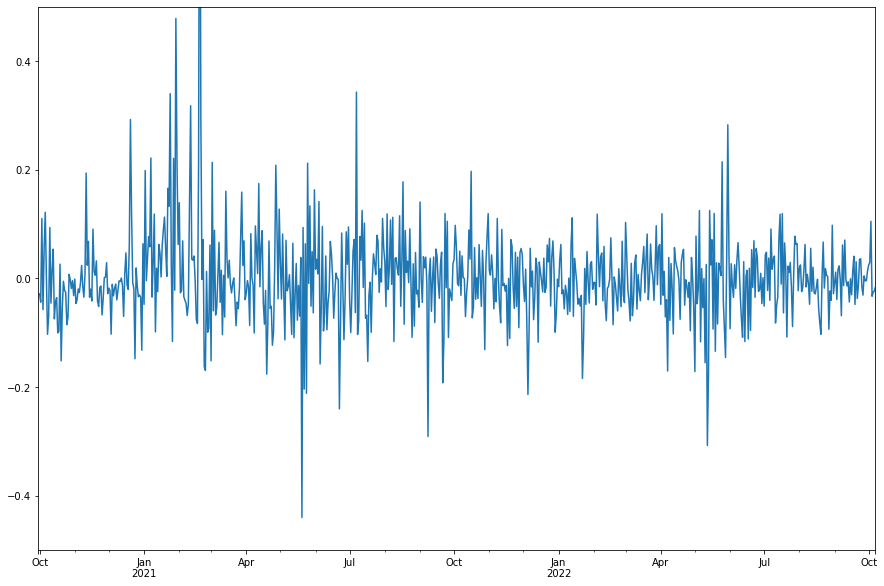

In [17]:
# Ploting daily return Cap

PRICE['RETURN'].plot(figsize=(15,10),ylim=(-0.5,0.5))

In [18]:
# Annual return based on daily return

Ann_return_d = pow((1+PRICE.iloc[-1,2]),365)-1
print('Annualized return based on day return:',Ann_return_d)

Ann_return_w = pow((1+PRICE.iloc[-1,3]),52)-1
print('Annualized return based on week return:',Ann_return_w)

Ann_return_m = pow((1+PRICE.iloc[-1,4]),12)-1
print('Annualized return based on month return:',Ann_return_m)

Ann_return_q = pow((1+PRICE.iloc[-1,5]),12)-1
print('Annualized return based on quartal return:',Ann_return_q)

Annualized return based on day return: -0.9970411889380133
Annualized return based on week return: 15.641317854877833
Annualized return based on month return: 1.8380257354494454
Annualized return based on quartal return: -0.6023408605640667


In [19]:
print(PRICE.iloc[-1,3])

0.05556353567122496


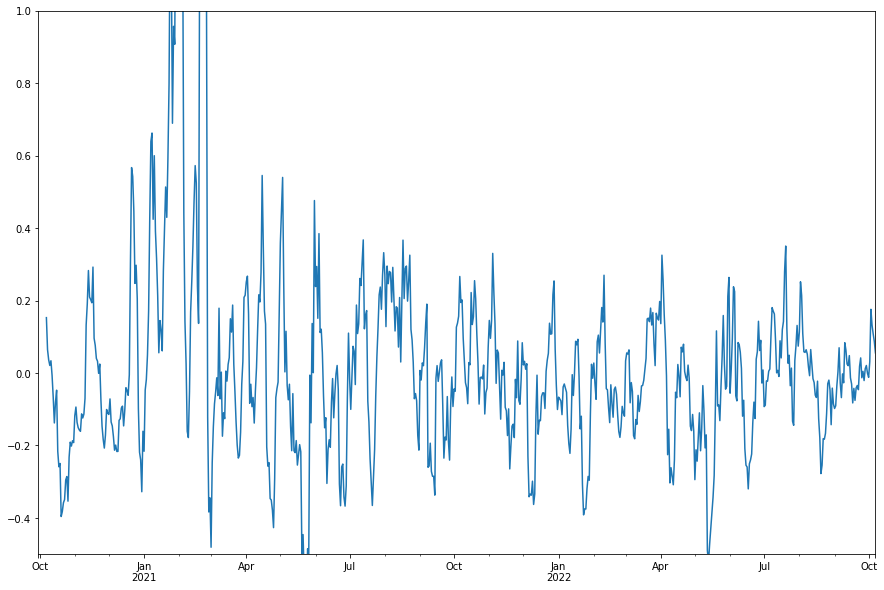

In [20]:
# Ploting weekly return Cap

PRICE['PCT_CHANGE_7DAYS'].plot(figsize=(15,10),ylim = (-0.5,1))

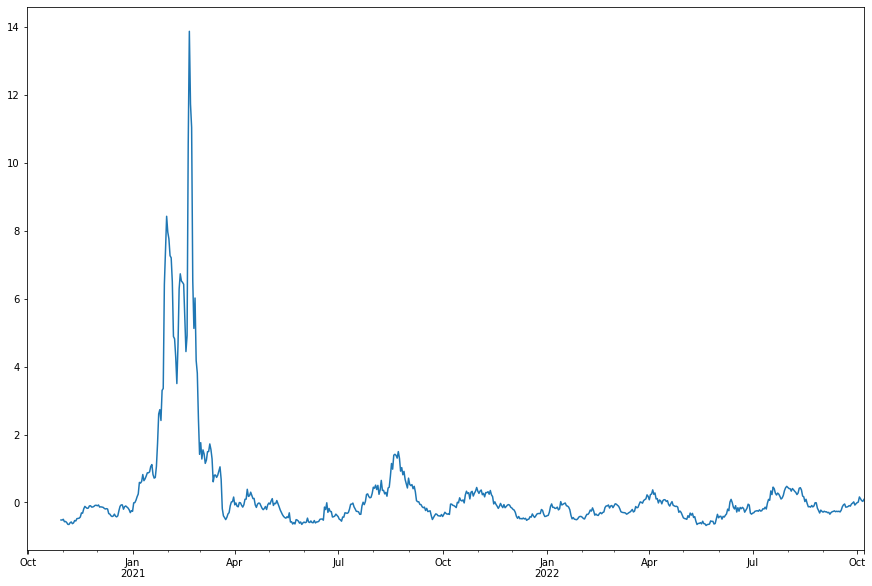

In [21]:
# Ploting weekly return DODO

PRICE['PCT_CHANGE_30DAYS'].plot(figsize=(15,10))

In [25]:
# Calculate daily average volume base on last 30 days

Daily_avg_volume = np.average(VOLUME['2022-09-02':'2022-10-02'])

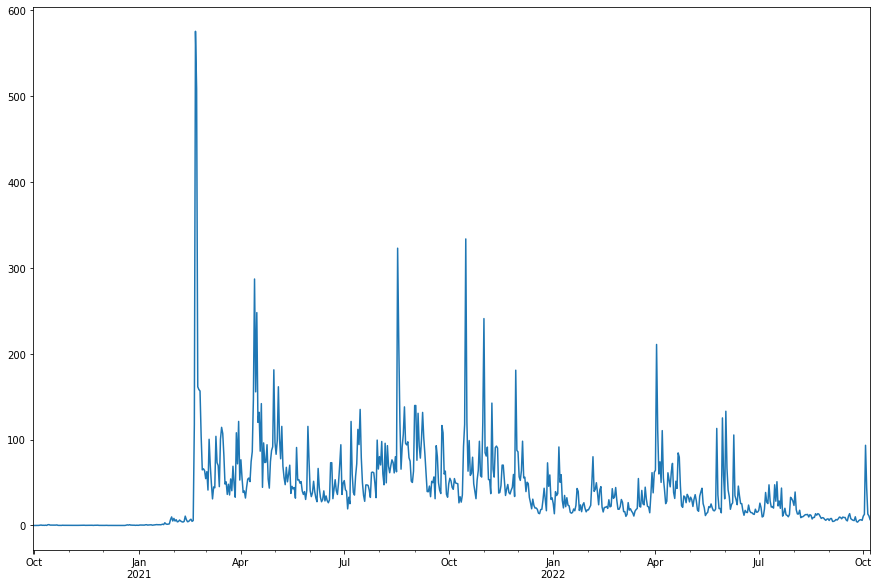

In [23]:
# Ploting daily volume in millions Cap

(VOLUME['VOLUME']/1000000).plot(figsize=(15,10))

In [26]:
Daily_avg_volume

7695670.492232618

In [27]:
Annualized_volume = Daily_avg_volume*365

In [28]:
Annualized_volume

2808919729.6649055

In [29]:
# Import data (fees) last 30 days

fee_Cap = pd.read_csv('/content/Daily Fees In The Past 30 Days. 2022-10-08 DODO.csv')

In [30]:
# Ploting daily fee last 30 days - Cap

fee_Cap['Date'] = pd.to_datetime(fee_Cap['Date'])

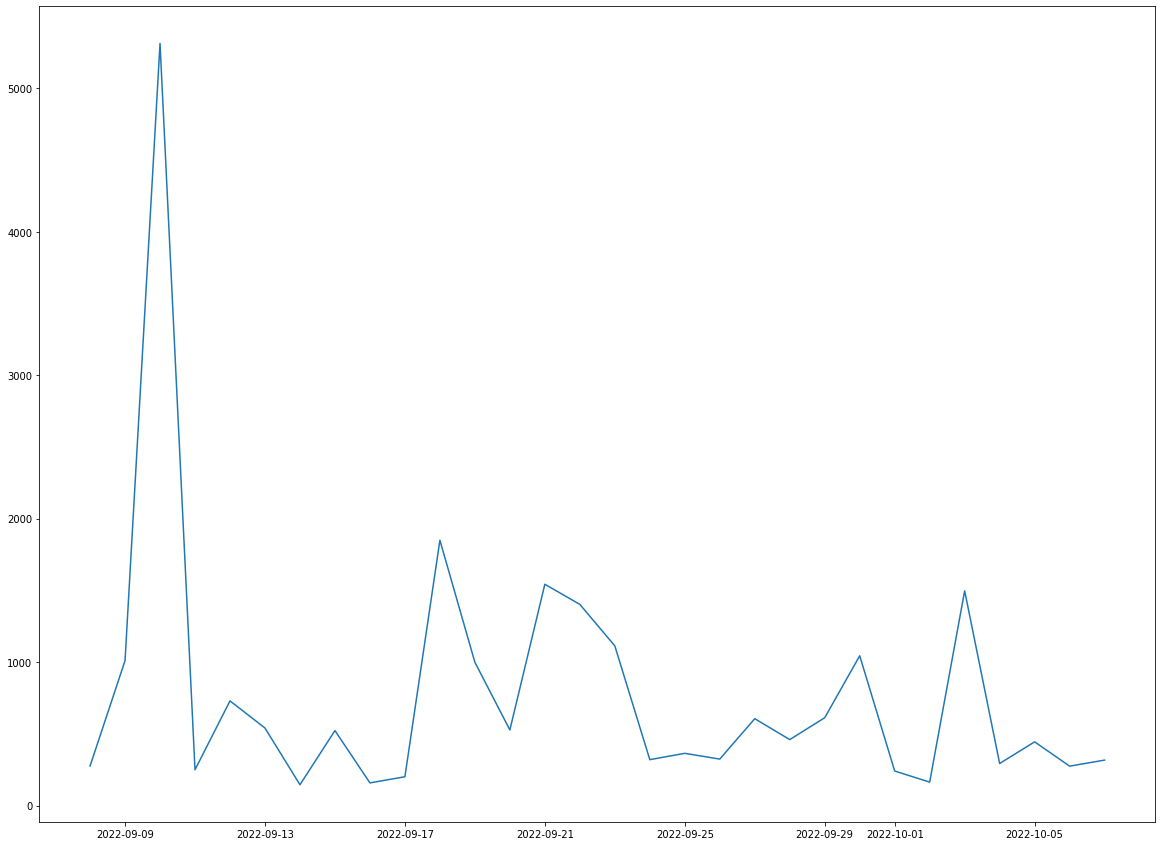

In [31]:
plt.figure(figsize=(20, 15))
plt.plot(fee_Cap['Date'], fee_Cap['Fees ($)'])
plt.show()

In [32]:
# Daily average fees based on last 30 days

Daily_avg_fee = np.average(fee_Cap['Fees ($)'])

In [33]:
Daily_avg_fee

784.4703333333332

In [34]:
# Annualized fee

Annualized_fee = Daily_avg_fee*365

In [35]:
Annualized_fee

286331.67166666663

In [36]:
TVL

,tvl
2020-11-10 00:00:00+00:00,2.527670e+07
2020-11-11 00:00:00+00:00,2.471061e+07
2020-11-12 00:00:00+00:00,2.428918e+07
2020-11-13 00:00:00+00:00,2.472006e+07
2020-11-14 00:00:00+00:00,2.468119e+07
...,...
2022-10-03 00:00:00+00:00,9.235524e+07
2022-10-04 00:00:00+00:00,9.471640e+07
2022-10-05 00:00:00+00:00,9.480050e+07
2022-10-06 00:00:00+00:00,9.466827e+07


**FEE = REVENUE FOR Cap**

In [37]:
# TVL in millions

TVL_Cap = TVL/1e6

In [38]:
TVL_Cap

,tvl
2020-11-10 00:00:00+00:00,25.276700
2020-11-11 00:00:00+00:00,24.710610
2020-11-12 00:00:00+00:00,24.289185
2020-11-13 00:00:00+00:00,24.720056
2020-11-14 00:00:00+00:00,24.681188
...,...
2022-10-03 00:00:00+00:00,92.355239
2022-10-04 00:00:00+00:00,94.716396
2022-10-05 00:00:00+00:00,94.800501
2022-10-06 00:00:00+00:00,94.668267


In [39]:
first = TVL.iloc[-1,0]
second = TVL.iloc[667,0]
# Turnover TVL last 30 days

TVL_30days_turnover = first/second

In [40]:
TVL_30days_turnover

0.8566388632169482

In [41]:
# Annulized volatility

Price_ = PRICE['2022-01-01':'2022-10-05']['PRICE']
Price_chg = (np.log(Price_) - np.log(Price_.shift(1)))[1:]
vol_Cap = np.std(Price_chg)
ann_vol_Cap = vol_Cap*np.sqrt(365)

In [42]:
ann_vol_Cap

1.2285430142739349

In [43]:
# Fully diluted Market Cap

FD_MC_Cap = MARKET_CAP_FULLY_DILUTED.iloc[-1,0]
print('FD_MC_Cap=',FD_MC_Cap)

# Circulated Market Cap

C_MC_Cap = MARKET_CAP_CIRCULATING.iloc[-1,0]
print('C_MC_Cap=',C_MC_Cap)

# Ratio MarketCap/Annulized fee

MC_AF = C_MC_Cap/Annualized_fee
print('MC_AF=',MC_AF)

# Ratio MarketCap/Annulized revenue

MC_AR = C_MC_Cap/Annualized_fee
print('MC_AR=',MC_AR)

# Ratio Fully Diluted Market Cap/Annulized fee

FD_AF = FD_MC_Cap/Annualized_fee
print('FD_AF=',FD_AF)

# Ratio Fully Diluted Market Cap/Annulized revenue

FD_AR = FD_MC_Cap/Annualized_fee
print('FD_AR=',FD_AR)

# Ratio MarketCap/TVL

MC_TVL =C_MC_Cap/TVL.iloc[-1,0]
print('MC_TVL=',MC_TVL)

# Ratio  Fully Diluted MarketCap/TVL

MC_FD_TVL =FD_MC_Cap/TVL.iloc[-1,0]
print('MC_FD_TVL=',MC_FD_TVL)

# % circullated supply

CS = C_MC_Cap/FD_MC_Cap
print('circullated supply=',CS)

FD_MC_Cap= 130238887.86824083
C_MC_Cap= 54419814.88505305
MC_AF= 190.05866367589942
MC_AR= 190.05866367589942
FD_AF= 454.85323754145713
FD_AR= 454.85323754145713
MC_TVL= 0.5718527291888412
MC_FD_TVL= 1.3685725251231784
circullated supply= 0.4178461270347157
